In [19]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
df_raw = pd.read_csv("./Random Forests/sgemm_product.csv", low_memory=False)

In [4]:
df_raw.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [8]:
df_raw['Run'] = df_raw[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)
df_raw.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [12]:
df_raw.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)', 'Run'],
      dtype='object')

In [31]:
df_raw.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis=1, inplace=True)

In [42]:
df_raw.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run'],
      dtype='object')

In [32]:
df, y, nas = proc_df(df_raw, 'Run')

In [33]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_train = int(len(df)*0.7)
x_train, x_test = split_vals(df, n_train)
y_train, y_test = split_vals(y, n_train)

In [34]:
def print_score(m):
    result = [m.score(x_train,y_train), m.score(x_test, y_test)]
    if hasattr(m, 'oob_score_'): result.append(m.oob_score_)
    return result

In [35]:
m=RandomForestRegressor(n_jobs=-1)
m.fit(x_train,y_train)
print_score(m)

/home/orange/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.9999579938938238, 0.3348926074734512]

### Random split of dataset using sklean

In [36]:
x_train, x_test, y_train, y_test = train_test_split(df ,y, test_size=0.33)

In [37]:
m=RandomForestRegressor(n_jobs=-1)
m.fit(x_train,y_train)
print_score(m)

/home/orange/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.999964920055775, 0.9998236834512494]

In [38]:
for nest in range(10,100,10):
    m=RandomForestRegressor(n_jobs=-1, n_estimators=nest)
    m.fit(x_train,y_train)
    print(print_score(m), 'Estimators', nest)

[0.9999639960608739, 0.999830907742554] Estimators 10
[0.9999719061424317, 0.9998494991576901] Estimators 20
[0.9999750435391752, 0.9998501138983344] Estimators 30
[0.9999761774655419, 0.9998542099224833] Estimators 40
[0.9999778679101731, 0.9998585393407214] Estimators 50
[0.9999772515635358, 0.999855144080336] Estimators 60
[0.99997818616462, 0.9998582452747109] Estimators 70
[0.9999782994766979, 0.9998598806163395] Estimators 80
[0.9999783899595507, 0.9998582138905768] Estimators 90


In [39]:
m=RandomForestRegressor(n_jobs=-1, n_estimators=80, max_features=0.33, min_samples_leaf=3, oob_score=True)
m.fit(x_train,y_train)
print_score(m)

[0.9952200368430316, 0.9922805419206077, 0.9909031656044996]

In [40]:
m=RandomForestRegressor(n_jobs=-1, n_estimators=80, max_features=0.33, min_samples_leaf=3, oob_score=True, max_depth=3)
m.fit(x_train,y_train)
print_score(m)

[0.3646298847238576, 0.36734466416943856, 0.36116483881192984]

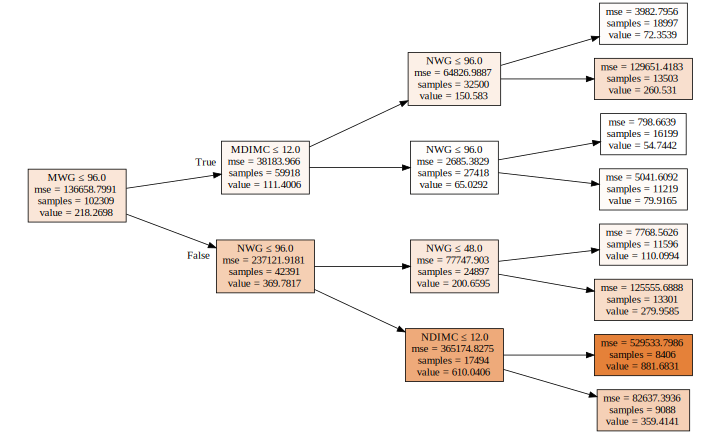

In [41]:
draw_tree(m.estimators_[0], x_train, precision=4)